In [3]:
from keras.datasets import mnist
import numpy as np
from tqdm import tqdm
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
def extract_patches(images, patch_size=5, threshold=0):
    patches = []
    num_pixels = patch_size * patch_size
    for image in tqdm(images, desc="Extracting patches"):
        # Slide over the image and extract patches
        for i in range(image.shape[0] - patch_size + 1):
            for j in range(image.shape[1] - patch_size + 1):
                patch = image[i:i + patch_size, j:j + patch_size]
                # Calculate the proportion of non-zero pixels
                if np.sum(patch) > 255 * num_pixels * threshold:  # Adjust the threshold as needed
                    patches.append(patch.flatten())
    return np.array(patches)

In [5]:
# Extract non-blank patches from the training data
patches = extract_patches(x_train)
np.save("patches.npy", patches)

Extracting patches: 100%|██████████| 60000/60000 [01:54<00:00, 521.75it/s]


In [6]:
import numpy as np
patches = np.load("patches.npy")

In [7]:
patches.shape

(20074704, 25)

In [8]:
from sklearn.cluster import KMeans

# Perform K-means clustering
n_clusters = 100  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(patches)



KMeans(n_clusters=100, random_state=0)

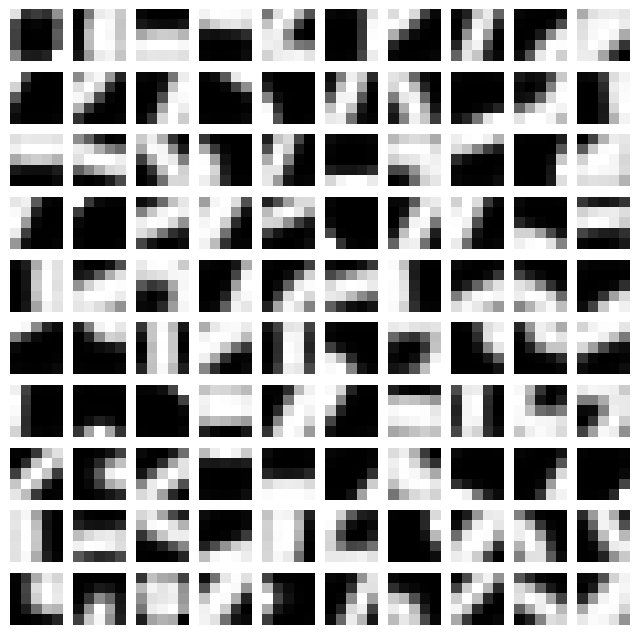

In [9]:
# Plot the centroids of the clusters
import matplotlib.pyplot as plt

patch_size=5

fig, axs = plt.subplots(10, 10, figsize=(8, 8))  # Adjusted for a 10x10 grid of subplots
axs = axs.ravel()  # Flatten the array of axes to simplify indexing

for i in range(n_clusters):
    axs[i].imshow(kmeans.cluster_centers_[i].reshape(patch_size, patch_size), cmap='gray')
    axs[i].axis('off')

# If there are fewer than 100 clusters, turn off the axes for the unused subplots
for j in range(i + 1, 100):
    axs[j].axis('off')

plt.show()